<a href="https://colab.research.google.com/github/chirag20019/ML_Programs/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = 'Adaniports.csv'
data = pd.read_csv(file_path)
# Display the first few rows
print(data.head())


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [ ]:
# Check for missing values
print(data.isnull().sum())

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


In [ ]:
# Handling missing values (if any)
# Example: Fill with mean for numeric columns and mode for categorical columns
data.fillna({
    col: data[col].mean() if data[col].dtype in ['float64', 'int64'] else data[col].mode()[0]
    for col in data.columns
}, inplace=True)

print("After handling missing data:")
print(data.isnull().sum())



After handling missing data:
Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


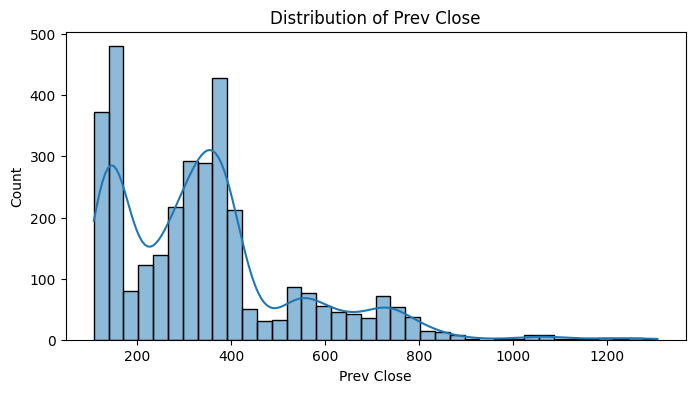

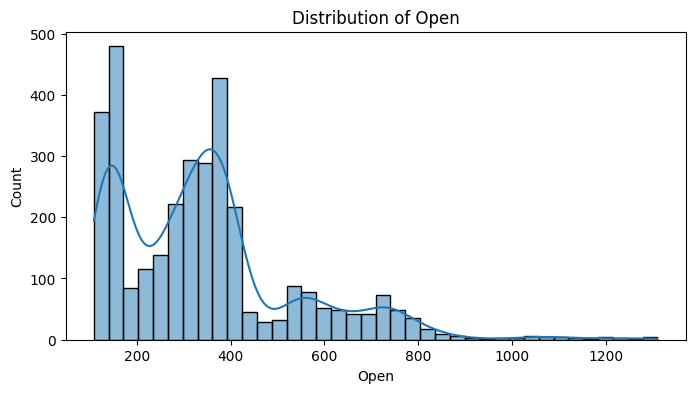

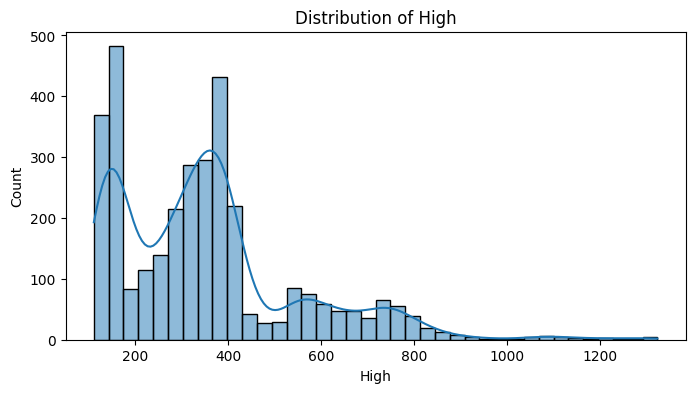

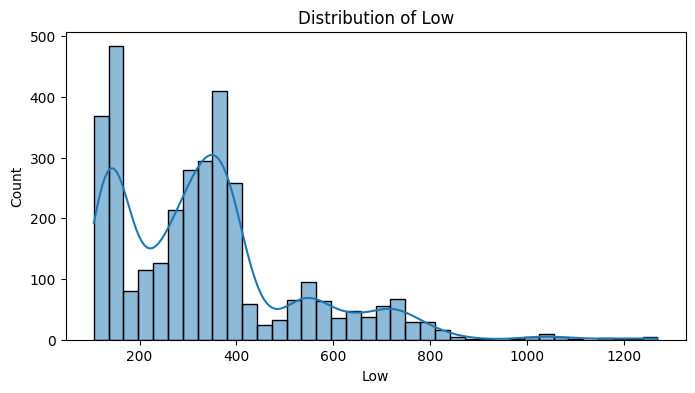

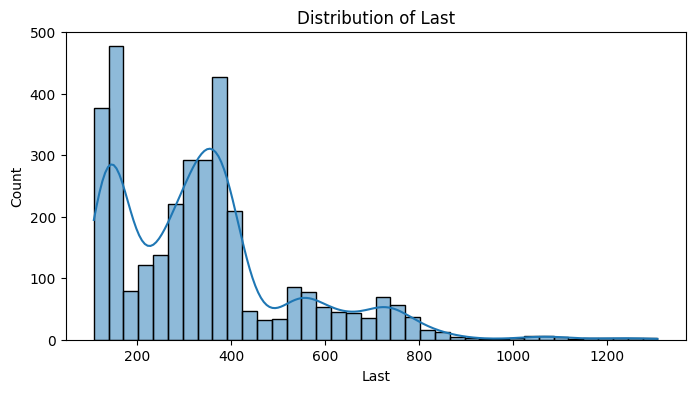

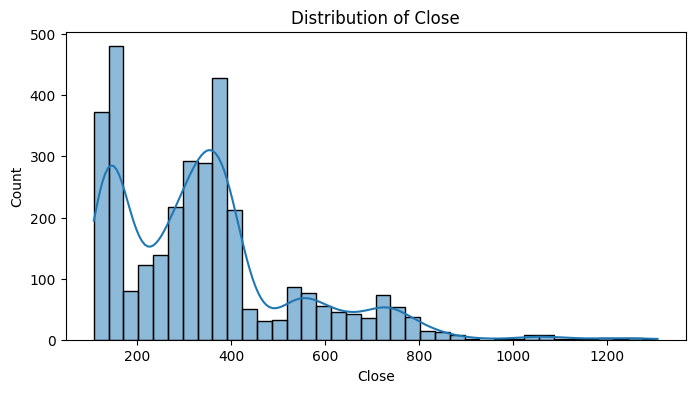

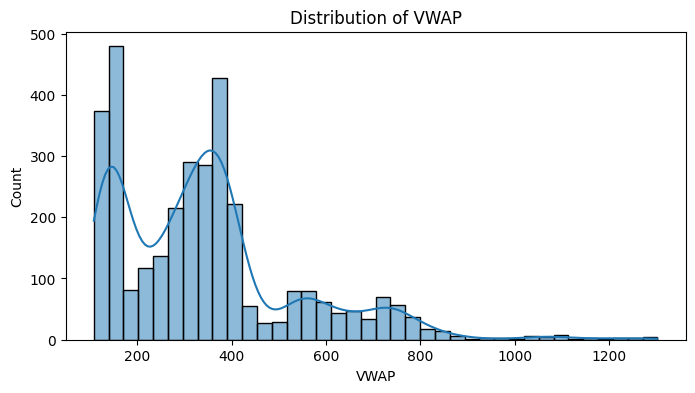

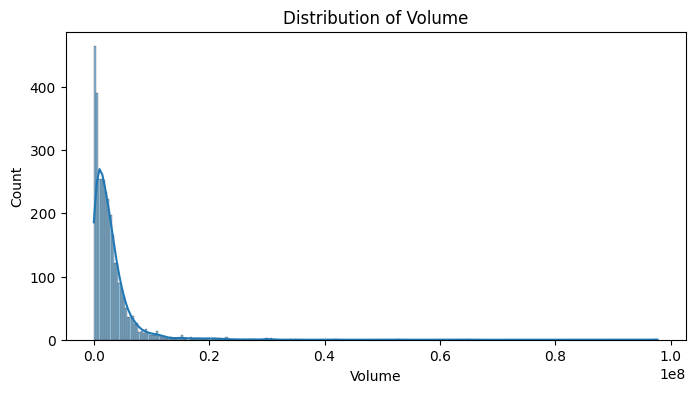

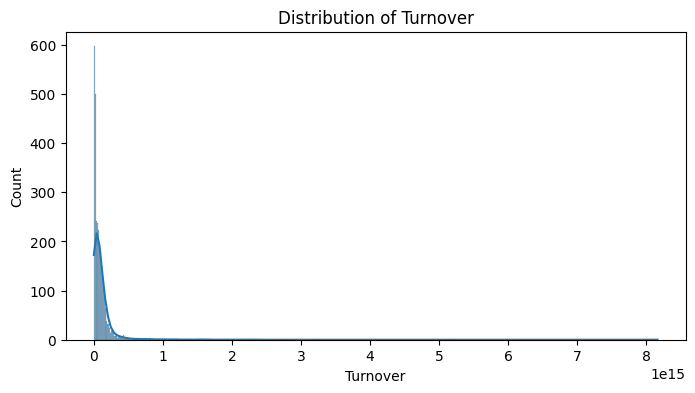

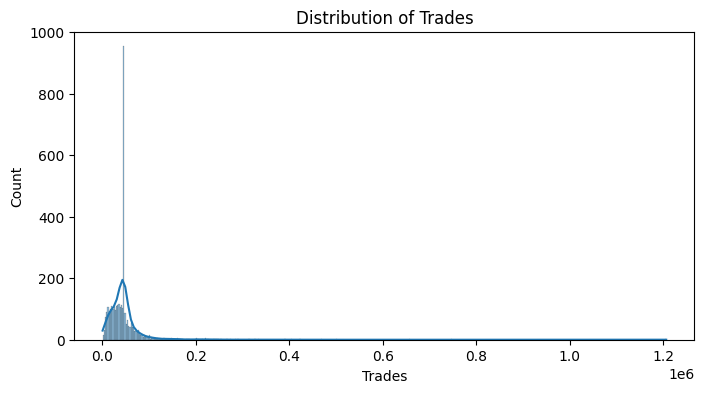

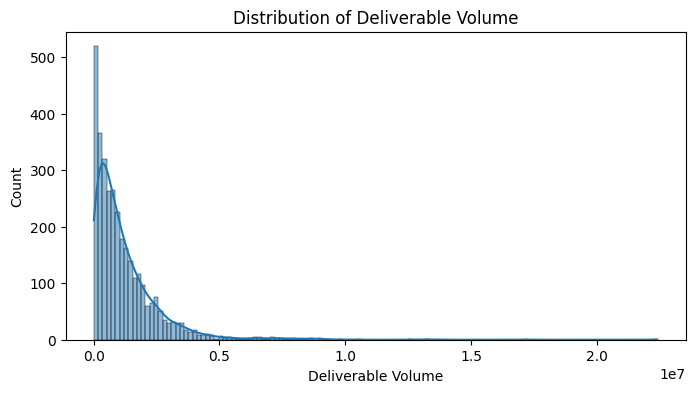

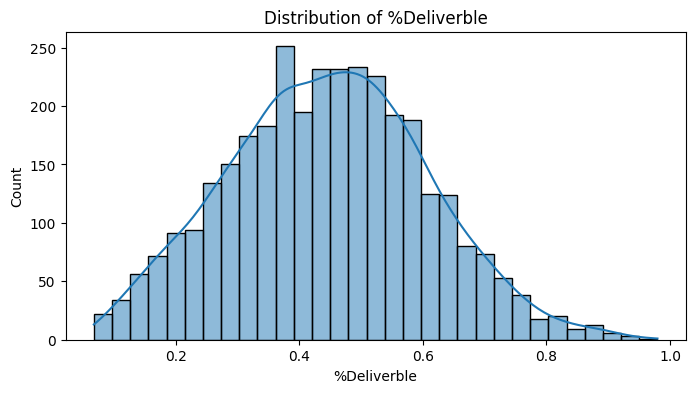

In [ ]:
# Distribution of numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


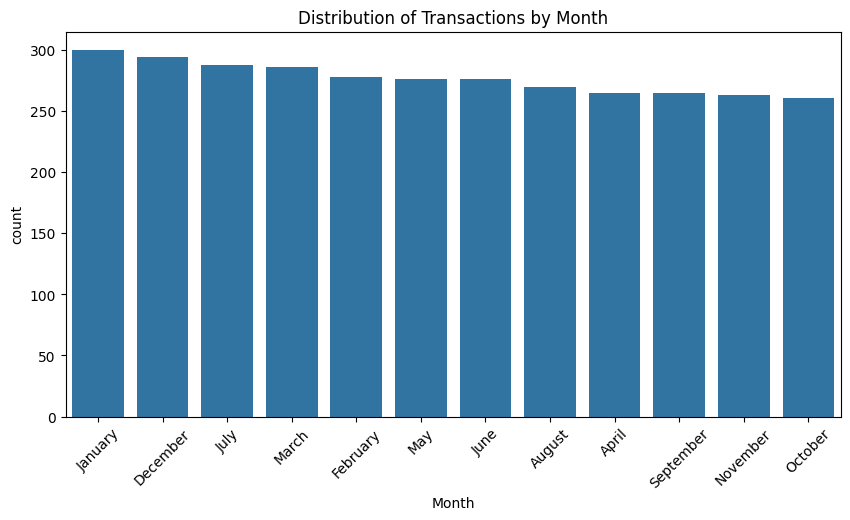

In [ ]:
# Example: Extract Month as a categorical variable
data['Month'] = pd.to_datetime(data['Date']).dt.month_name()
# Count plot for months
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=data, order=data['Month'].value_counts().index)
plt.title('Distribution of Transactions by Month')
plt.xticks(rotation=45)
plt.show()


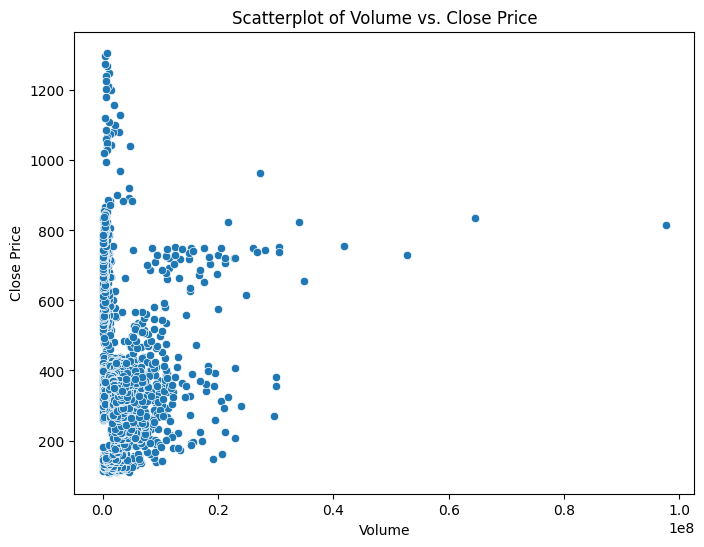

In [ ]:
# Example: Compare Volume and Close Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='Close', data=data)
plt.title('Scatterplot of Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


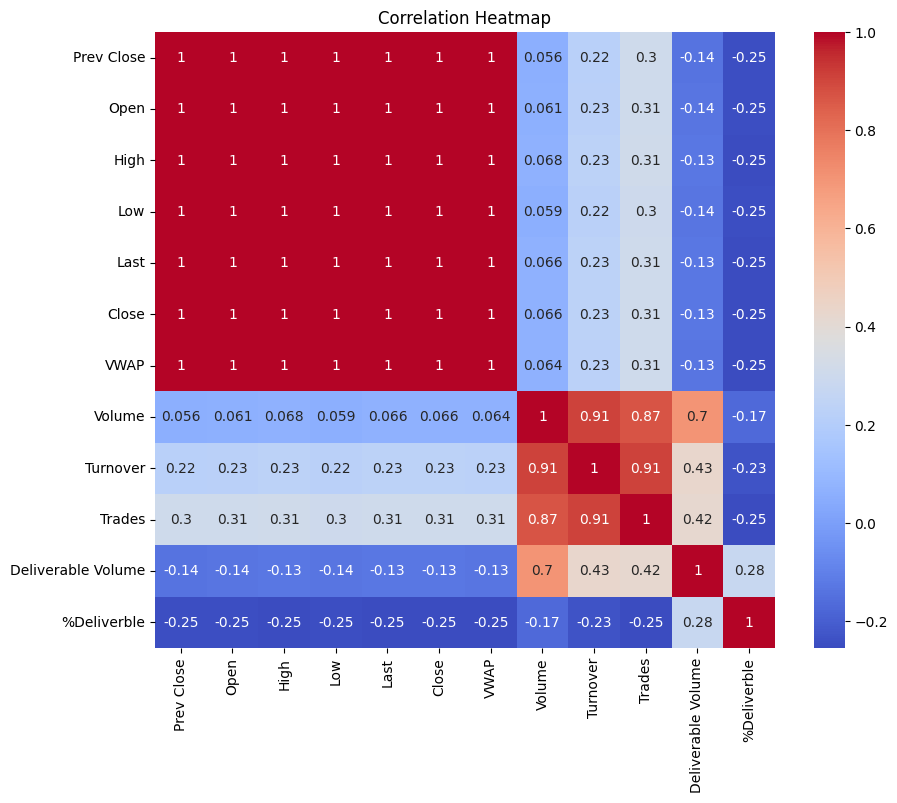

In [ ]:
# Correlation heatmap for numeric data
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


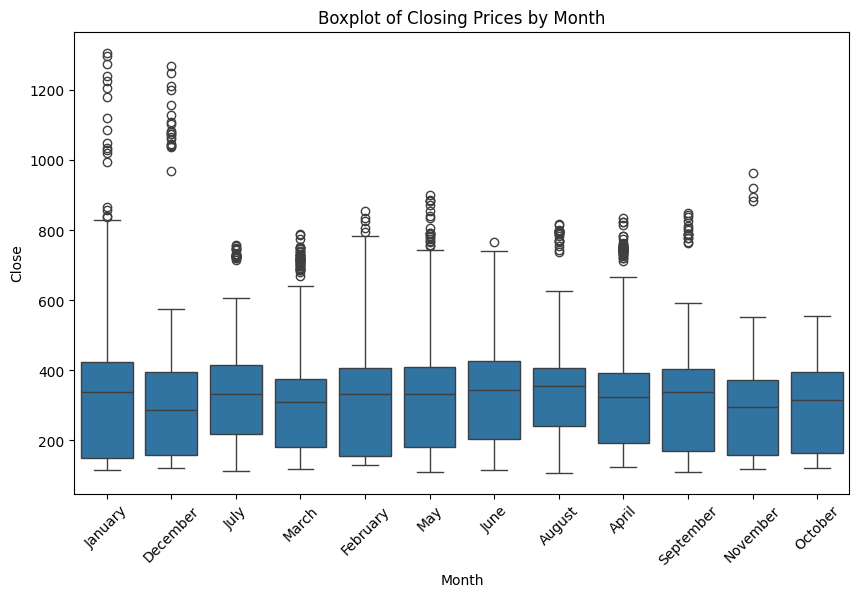

In [ ]:
# Example: Boxplot of Close Price across Months
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Close', data=data, order=data['Month'].value_counts().index)
plt.title('Boxplot of Closing Prices by Month')
plt.xticks(rotation=45)
plt.show()


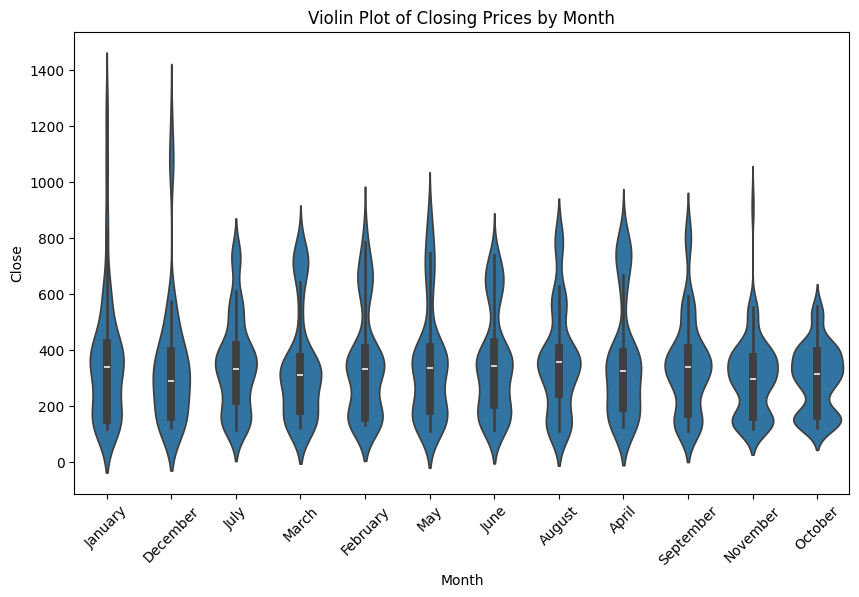

In [ ]:
# Example: Violin plot of Close Prices by Month
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='Close', data=data, order=data['Month'].value_counts().index)
plt.title('Violin Plot of Closing Prices by Month')
plt.xticks(rotation=45)
plt.show()
